# Setup and Data Overview

Objective:
- Set up the Python environment with required libraries
- Load all data files (fact and dimension tables)
- Perform initial data inspection
- Understand data structure and relationships

Table of Contents:
1. Environment Setup
2. Import Libraries
3. Load Data Files
4. Initial Data Inspection
5. Data Structure Summary`m

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully
Pandas version: 2.3.3
NumPy version: 1.26.4


## Load Data Files

Loading the star schema data structure:
- 1 Fact Table: fact_sales.csv
- 5 Dimension Tables: dim_customer, dim_item, dim_store, dim_time, dim_payment

In [6]:
data_path = 'data/'

fact_sales = pd.read_csv(f'{data_path}fact_sales.csv', encoding='latin-1')
dim_customer = pd.read_csv(f'{data_path}dim_customer.csv', encoding='latin-1')
dim_item = pd.read_csv(f'{data_path}dim_item.csv', encoding='latin-1')
dim_store = pd.read_csv(f'{data_path}dim_store.csv', encoding='latin-1')
dim_time = pd.read_csv(f'{data_path}dim_time.csv', encoding='latin-1')
dim_payment = pd.read_csv(f'{data_path}dim_payment.csv', encoding='latin-1')

print("Data files loaded successfully")
print(f"\nFact Table: {fact_sales.shape[0]:,} rows, {fact_sales.shape[1]} columns")
print(f"Customer Dimension: {dim_customer.shape[0]:,} rows, {dim_customer.shape[1]} columns")
print(f"Item Dimension: {dim_item.shape[0]:,} rows, {dim_item.shape[1]} columns")
print(f"Store Dimension: {dim_store.shape[0]:,} rows, {dim_store.shape[1]} columns")
print(f"Time Dimension: {dim_time.shape[0]:,} rows, {dim_time.shape[1]} columns")
print(f"Payment Dimension: {dim_payment.shape[0]:,} rows, {dim_payment.shape[1]} columns")

Data files loaded successfully

Fact Table: 1,000,000 rows, 9 columns
Customer Dimension: 9,191 rows, 4 columns
Item Dimension: 264 rows, 7 columns
Store Dimension: 726 rows, 4 columns
Time Dimension: 99,999 rows, 8 columns
Payment Dimension: 39 rows, 3 columns


## Initial Data Inspection

Examining the structure and content of each table to understand data quality and relationships.

In [7]:
print("FACT SALES TABLE")
print("="*80)
print("\nColumn Names and Data Types:")
print(fact_sales.dtypes)
print("\nFirst 5 rows:")
print(fact_sales.head())
print("\nBasic Statistics:")
print(fact_sales.describe())
print("\nMissing Values:")
print(fact_sales.isnull().sum())

FACT SALES TABLE

Column Names and Data Types:
payment_key       object
coustomer_key     object
time_key          object
item_key          object
store_key         object
quantity           int64
unit              object
unit_price       float64
total_price      float64
dtype: object

First 5 rows:
  payment_key coustomer_key time_key item_key store_key  quantity   unit  \
0        P026       C004510  T049189   I00177    S00307         1     ct   
1        P022       C008967  T041209   I00248    S00595         1  rolls   
2        P030       C007261   T03633   I00195    S00496         8     ct   
3        P032       C007048  T084631   I00131     S0086         8     ct   
4        P014       C006430  T071276   I00050    S00488         8   cans   

   unit_price  total_price  
0       35.00        35.00  
1       26.00        26.00  
2       12.50       100.00  
3       14.00       112.00  
4        8.00        64.00  

Basic Statistics:
        quantity  unit_price  total_price
count 1

In [9]:
print("CUSTOMER DIMENSION TABLE")
print("="*80)
print("\nColumn Names and Data Types:")
print(dim_customer.dtypes)
print("\nFirst 5 rows:")
print(dim_customer.head())
print("\nBasic Statistics:")
print(dim_customer.describe(include='all'))
print("\nMissing Values:")
print(dim_customer.isnull().sum())
print(f"\nUnique customers: {dim_customer['coustomer_key'].nunique()}")

CUSTOMER DIMENSION TABLE

Column Names and Data Types:
coustomer_key    object
name             object
contact_no        int64
nid               int64
dtype: object

First 5 rows:
  coustomer_key             name     contact_no            nid
0       C000001            sumit  8801920345851  7505075708899
1       C000002         tammanne  8801817069329  1977731324842
2       C000003    kailash kumar  8801663795774  3769494056318
3       C000004  bhagwati prasad  8801533627961  9378834712725
4       C000005             ajay  8801943715786  3540815556323

Basic Statistics:
       coustomer_key   name       contact_no              nid
count           9191   9164          9191.00          9191.00
unique          9191   4534              NaN              NaN
top          C000001  pooja              NaN              NaN
freq               1    185              NaN              NaN
mean             NaN    NaN 8801753210190.39 5481174588788.11
std              NaN    NaN     143945846.59 262345

In [10]:
print("ITEM DIMENSION TABLE")
print("="*80)
print("\nColumn Names and Data Types:")
print(dim_item.dtypes)
print("\nFirst 5 rows:")
print(dim_item.head())
print("\nBasic Statistics:")
print(dim_item.describe(include='all'))
print("\nMissing Values:")
print(dim_item.isnull().sum())
print(f"\nUnique items: {dim_item['item_key'].nunique()}")

ITEM DIMENSION TABLE

Column Names and Data Types:
item_key        object
item_name       object
desc            object
unit_price     float64
man_country     object
supplier        object
unit            object
dtype: object

First 5 rows:
  item_key                        item_name                desc  unit_price  \
0   I00001       A&W Root Beer - 12 oz cans  a. Beverage - Soda       11.50   
1   I00002  A&W Root Beer Diet - 12 oz cans  a. Beverage - Soda        6.75   
2   I00003    Barq's Root Beer - 12 oz cans  a. Beverage - Soda        6.75   
3   I00004                 Cherry Coke 12oz  a. Beverage - Soda        6.75   
4   I00005         Cherry Coke Zero 12 pack  a. Beverage - Soda        6.75   

   man_country            supplier  unit  
0  Netherlands     Bolsius Boxmeer  cans  
1       poland  CHROMADURLIN S.A.S  cans  
2   Bangladesh        DENIMACH LTD  cans  
3  Netherlands     Bolsius Boxmeer  cans  
4      Finland         HARDFORD AB  cans  

Basic Statistics:
       

In [11]:
print("STORE DIMENSION TABLE")
print("="*80)
print("\nColumn Names and Data Types:")
print(dim_store.dtypes)
print("\nFirst 5 rows:")
print(dim_store.head())
print("\nBasic Statistics:")
print(dim_store.describe(include='all'))
print("\nMissing Values:")
print(dim_store.isnull().sum())
print(f"\nUnique stores: {dim_store['store_key'].nunique()}")
print(f"\nStores by division:")
print(dim_store['division'].value_counts())

STORE DIMENSION TABLE

Column Names and Data Types:
store_key    object
division     object
district     object
upazila      object
dtype: object

First 5 rows:
  store_key division  district         upazila
0     S0001   SYLHET  HABIGANJ      AJMIRIGANJ
1     S0002   SYLHET  HABIGANJ         BAHUBAL
2     S0003   SYLHET  HABIGANJ      BANIACHONG
3     S0004   SYLHET  HABIGANJ     CHUNARUGHAT
4     S0005   SYLHET  HABIGANJ  HABIGANJ SADAR

Basic Statistics:
       store_key division district  upazila
count        726      726      726      726
unique       726        7       64      540
top        S0001    DHAKA    DHAKA  KOTWALI
freq           1      280      162        5

Missing Values:
store_key    0
division     0
district     0
upazila      0
dtype: int64

Unique stores: 726

Stores by division:
division
DHAKA         280
CHITTAGONG    136
RAJSHAHI       84
KHULNA         78
RANGPUR        58
BARISAL        52
SYLHET         38
Name: count, dtype: int64


In [12]:
print("TIME DIMENSION TABLE")
print("="*80)
print("\nColumn Names and Data Types:")
print(dim_time.dtypes)
print("\nFirst 5 rows:")
print(dim_time.head())
print("\nBasic Statistics:")
print(dim_time.describe(include='all'))
print("\nMissing Values:")
print(dim_time.isnull().sum())
print(f"\nUnique time keys: {dim_time['time_key'].nunique()}")
print(f"\nDate range: {dim_time['date'].min()} to {dim_time['date'].max()}")

TIME DIMENSION TABLE

Column Names and Data Types:
time_key    object
date        object
hour         int64
day          int64
week        object
month        int64
quarter     object
year         int64
dtype: object

First 5 rows:
  time_key              date  hour  day      week  month quarter  year
0   T00001  20-05-2017 14:56    14   20  3rd Week      5      Q2  2017
1   T00002  30-01-2015 22:14    22   30  4th Week      1      Q1  2015
2   T00003  14-03-2020 02:34     2   14  2nd Week      3      Q1  2020
3   T00004  27-04-2018 12:19    12   27  4th Week      4      Q2  2018
4   T00005  14-04-2018 10:43    10   14  2nd Week      4      Q2  2018

Basic Statistics:
       time_key              date     hour      day      week    month  \
count     99999             99999 99999.00 99999.00     99999 99999.00   
unique    99999             98578      NaN      NaN         4      NaN   
top      T00001  08-08-2019 08:53      NaN      NaN  4th Week      NaN   
freq          1            

In [13]:
print("PAYMENT DIMENSION TABLE")
print("="*80)
print("\nColumn Names and Data Types:")
print(dim_payment.dtypes)
print("\nFirst 5 rows:")
print(dim_payment.head())
print("\nBasic Statistics:")
print(dim_payment.describe(include='all'))
print("\nMissing Values:")
print(dim_payment.isnull().sum())
print(f"\nUnique payment keys: {dim_payment['payment_key'].nunique()}")
print(f"\nPayment types distribution:")
print(dim_payment['trans_type'].value_counts())

PAYMENT DIMENSION TABLE

Column Names and Data Types:
payment_key    object
trans_type     object
bank_name      object
dtype: object

First 5 rows:
  payment_key trans_type                         bank_name
0        P001       cash                               NaN
1        P002       card                   AB Bank Limited
2        P003       card  Bangladesh Commerce Bank Limited
3        P004       card                 Bank Asia Limited
4        P005       card                 BRAC Bank Limited

Basic Statistics:
       payment_key trans_type        bank_name
count           39         39               38
unique          39          3               38
top           P001       card  AB Bank Limited
freq             1         35                1

Missing Values:
payment_key    0
trans_type     0
bank_name      1
dtype: int64

Unique payment keys: 39

Payment types distribution:
trans_type
card      35
mobile     3
cash       1
Name: count, dtype: int64


## Data Quality Summary

Consolidating findings from all tables to identify data quality issues and preparation needs.

In [14]:
print("DATA QUALITY SUMMARY")
print("="*80)

data_quality = {
    'Table': ['Fact Sales', 'Customer', 'Item', 'Store', 'Time', 'Payment'],
    'Total Rows': [
        f"{fact_sales.shape[0]:,}",
        f"{dim_customer.shape[0]:,}",
        f"{dim_item.shape[0]:,}",
        f"{dim_store.shape[0]:,}",
        f"{dim_time.shape[0]:,}",
        f"{dim_payment.shape[0]:,}"
    ],
    'Missing Values': [
        f"{fact_sales.isnull().sum().sum()}",
        f"{dim_customer.isnull().sum().sum()}",
        f"{dim_item.isnull().sum().sum()}",
        f"{dim_store.isnull().sum().sum()}",
        f"{dim_time.isnull().sum().sum()}",
        f"{dim_payment.isnull().sum().sum()}"
    ],
    'Key Issues': [
        'Unit column: 3,723 nulls',
        'Name column: 27 nulls',
        'Unit column: 1 null',
        'None',
        'None',
        'Bank name: 1 null (cash payment)'
    ]
}

df_quality = pd.DataFrame(data_quality)
print(df_quality.to_string(index=False))

print("\n" + "="*80)
print("COLUMN NAME ISSUES IDENTIFIED:")
print("- 'coustomer_key' misspelled in both fact_sales and dim_customer tables")
print("- Should be 'customer_key' for consistency")

print("\n" + "="*80)
print("KEY STATISTICS:")
print(f"Total Sales Transactions: {fact_sales.shape[0]:,}")
print(f"Total Revenue: ${fact_sales['total_price'].sum():,.2f}")
print(f"Average Transaction Value: ${fact_sales['total_price'].mean():.2f}")
print(f"Date Range: 2015-01-01 to 2020-12-31")
print(f"Number of Unique Customers: {dim_customer.shape[0]:,}")
print(f"Number of Products: {dim_item.shape[0]}")
print(f"Number of Store Locations: {dim_store.shape[0]}")

DATA QUALITY SUMMARY
     Table Total Rows Missing Values                       Key Issues
Fact Sales  1,000,000           3723         Unit column: 3,723 nulls
  Customer      9,191             27            Name column: 27 nulls
      Item        264              1              Unit column: 1 null
     Store        726              0                             None
      Time     99,999              0                             None
   Payment         39              1 Bank name: 1 null (cash payment)

COLUMN NAME ISSUES IDENTIFIED:
- 'coustomer_key' misspelled in both fact_sales and dim_customer tables
- Should be 'customer_key' for consistency

KEY STATISTICS:
Total Sales Transactions: 1,000,000
Total Revenue: $105,401,435.75
Average Transaction Value: $105.40
Date Range: 2015-01-01 to 2020-12-31
Number of Unique Customers: 9,191
Number of Products: 264
Number of Store Locations: 726


## Referential Integrity Verification

Checking if all foreign keys in the fact table have corresponding records in dimension tables.

In [16]:
print("REFERENTIAL INTEGRITY CHECK")
print("="*80)

fact_customers = set(fact_sales['coustomer_key'].unique())
dim_customers = set(dim_customer['coustomer_key'].unique())
missing_customers = fact_customers - dim_customers
print(f"\nCustomer Keys:")
print(f"  Unique in Fact Table: {len(fact_customers):,}")
print(f"  Unique in Dimension: {len(dim_customers):,}")
print(f"  Missing in Dimension: {len(missing_customers)}")

fact_items = set(fact_sales['item_key'].unique())
dim_items = set(dim_item['item_key'].unique())
missing_items = fact_items - dim_items
print(f"\nItem Keys:")
print(f"  Unique in Fact Table: {len(fact_items)}")
print(f"  Unique in Dimension: {len(dim_items)}")
print(f"  Missing in Dimension: {len(missing_items)}")

fact_stores = set(fact_sales['store_key'].unique())
dim_stores = set(dim_store['store_key'].unique())
missing_stores = fact_stores - dim_stores
print(f"\nStore Keys:")
print(f"  Unique in Fact Table: {len(fact_stores)}")
print(f"  Unique in Dimension: {len(dim_stores)}")
print(f"  Missing in Dimension: {len(missing_stores)}")

fact_times = set(fact_sales['time_key'].unique())
dim_times = set(dim_time['time_key'].unique())
missing_times = fact_times - dim_times
print(f"\nTime Keys:")
print(f"  Unique in Fact Table: {len(fact_times):,}")
print(f"  Unique in Dimension: {len(dim_times):,}")
print(f"  Missing in Dimension: {len(missing_times)}")

fact_payments = set(fact_sales['payment_key'].unique())
dim_payments = set(dim_payment['payment_key'].unique())
missing_payments = fact_payments - dim_payments
print(f"\nPayment Keys:")
print(f"  Unique in Fact Table: {len(fact_payments)}")
print(f"  Unique in Dimension: {len(dim_payments)}")
print(f"  Missing in Dimension: {len(missing_payments)}")

print("\n" + "="*80)
if (len(missing_customers) + len(missing_items) + len(missing_stores) + 
    len(missing_times) + len(missing_payments)) == 0:
    print("RESULT: All foreign keys have valid references. Data integrity is maintained.")
else:
    print("WARNING: Some foreign keys are missing in dimension tables.")

REFERENTIAL INTEGRITY CHECK

Customer Keys:
  Unique in Fact Table: 9,191
  Unique in Dimension: 9,191
  Missing in Dimension: 0

Item Keys:
  Unique in Fact Table: 264
  Unique in Dimension: 264
  Missing in Dimension: 0

Store Keys:
  Unique in Fact Table: 726
  Unique in Dimension: 726
  Missing in Dimension: 0

Time Keys:
  Unique in Fact Table: 99,993
  Unique in Dimension: 99,999
  Missing in Dimension: 0

Payment Keys:
  Unique in Fact Table: 39
  Unique in Dimension: 39
  Missing in Dimension: 0

RESULT: All foreign keys have valid references. Data integrity is maintained.


## Summary and Next Steps

Key findings from this initial data exploration that will guide subsequent analysis.

In [17]:
data_overview = {
    'fact_table': {
        'name': 'fact_sales',
        'rows': fact_sales.shape[0],
        'columns': fact_sales.shape[1],
        'total_revenue': fact_sales['total_price'].sum(),
        'avg_transaction': fact_sales['total_price'].mean(),
        'date_range': '2015-01-01 to 2020-12-31'
    },
    'dimensions': {
        'customers': dim_customer.shape[0],
        'items': dim_item.shape[0],
        'stores': dim_store.shape[0],
        'time_periods': dim_time.shape[0],
        'payment_methods': dim_payment.shape[0]
    },
    'data_quality_issues': {
        'fact_sales_missing_units': 3723,
        'customer_missing_names': 27,
        'item_missing_units': 1,
        'payment_missing_bank': 1,
        'column_name_typo': 'coustomer_key should be customer_key'
    },
    'business_metrics': {
        'total_transactions': fact_sales.shape[0],
        'total_revenue': fact_sales['total_price'].sum(),
        'avg_order_value': fact_sales['total_price'].mean(),
        'avg_quantity_per_order': fact_sales['quantity'].mean(),
        'years_of_data': 6
    }
}

print("DATA OVERVIEW SUMMARY")
print("="*80)
for category, details in data_overview.items():
    print(f"\n{category.upper().replace('_', ' ')}:")
    for key, value in details.items():
        if isinstance(value, float):
            print(f"  {key}: {value:,.2f}")
        else:
            print(f"  {key}: {value}")

DATA OVERVIEW SUMMARY

FACT TABLE:
  name: fact_sales
  rows: 1000000
  columns: 9
  total_revenue: 105,401,435.75
  avg_transaction: 105.40
  date_range: 2015-01-01 to 2020-12-31

DIMENSIONS:
  customers: 9191
  items: 264
  stores: 726
  time_periods: 99999
  payment_methods: 39

DATA QUALITY ISSUES:
  fact_sales_missing_units: 3723
  customer_missing_names: 27
  item_missing_units: 1
  payment_missing_bank: 1
  column_name_typo: coustomer_key should be customer_key

BUSINESS METRICS:
  total_transactions: 1000000
  total_revenue: 105,401,435.75
  avg_order_value: 105.40
  avg_quantity_per_order: 6.00
  years_of_data: 6


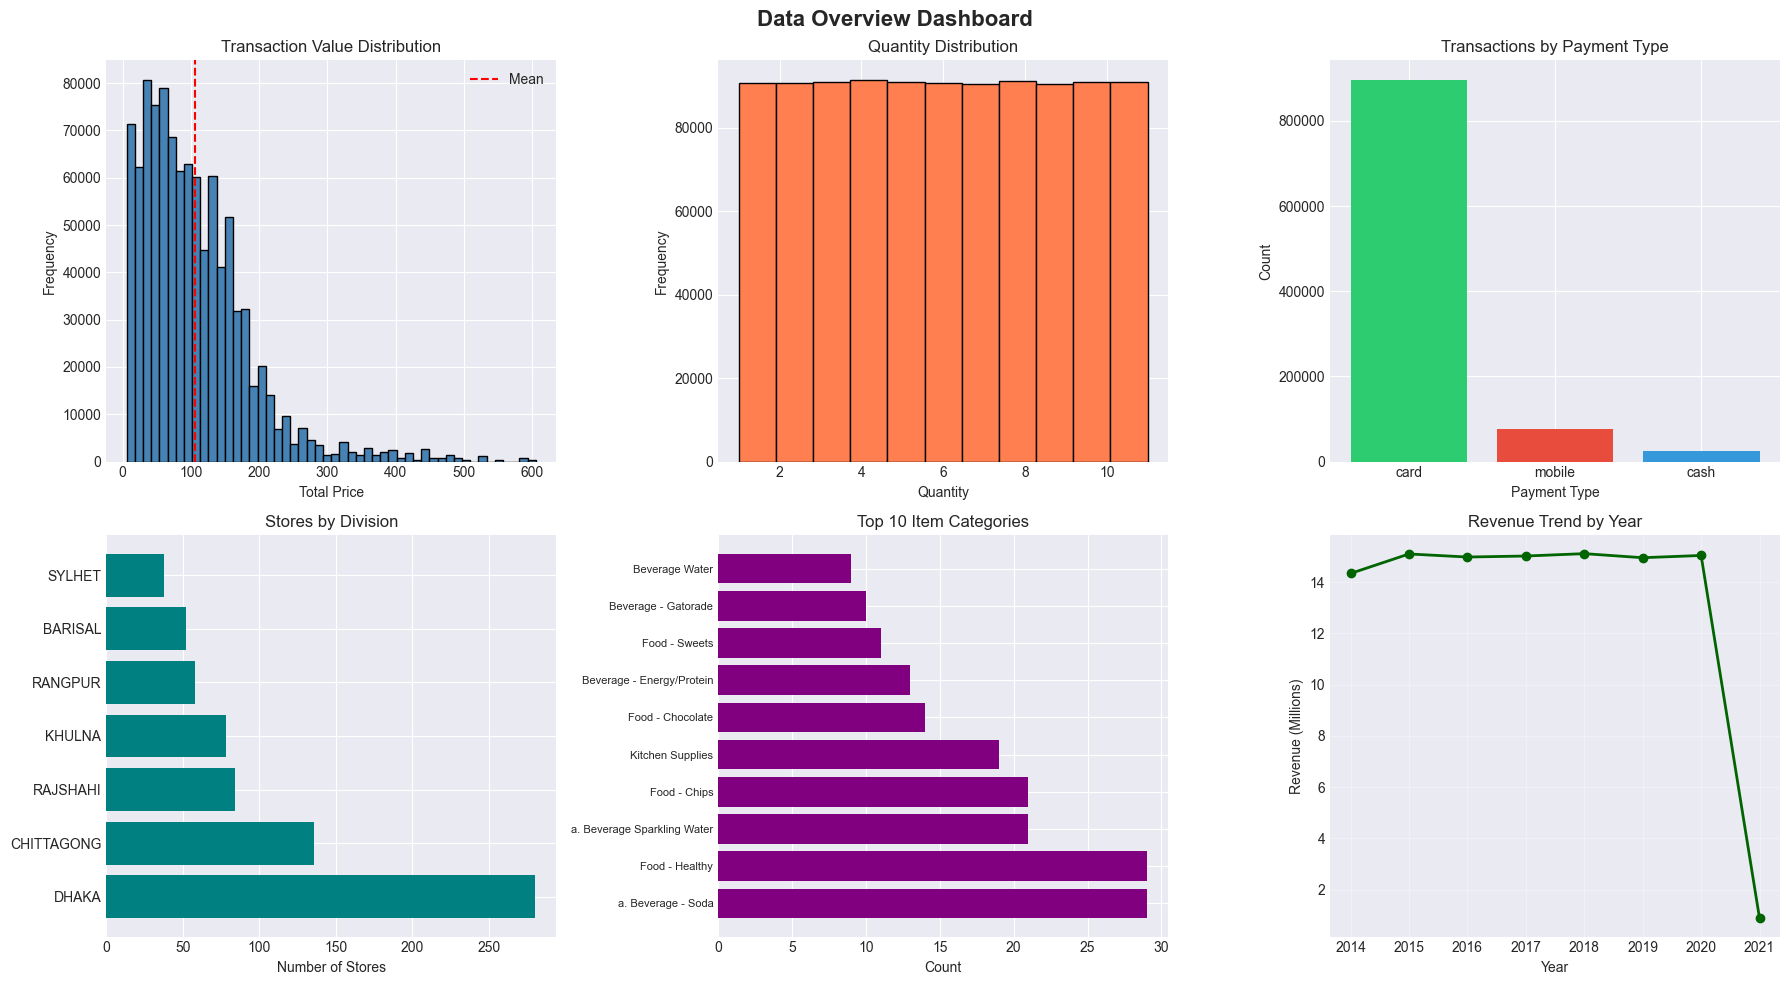


Visualization complete. This provides an overview of the data distribution.


In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Data Overview Dashboard', fontsize=16, fontweight='bold')

axes[0, 0].hist(fact_sales['total_price'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Transaction Value Distribution')
axes[0, 0].set_xlabel('Total Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(fact_sales['total_price'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()

axes[0, 1].hist(fact_sales['quantity'], bins=11, color='coral', edgecolor='black')
axes[0, 1].set_title('Quantity Distribution')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Frequency')

payment_counts = fact_sales['payment_key'].map(
    dim_payment.set_index('payment_key')['trans_type']
).value_counts()
axes[0, 2].bar(payment_counts.index, payment_counts.values, color=['#2ecc71', '#e74c3c', '#3498db'])
axes[0, 2].set_title('Transactions by Payment Type')
axes[0, 2].set_xlabel('Payment Type')
axes[0, 2].set_ylabel('Count')

store_div_counts = dim_store['division'].value_counts()
axes[1, 0].barh(store_div_counts.index, store_div_counts.values, color='teal')
axes[1, 0].set_title('Stores by Division')
axes[1, 0].set_xlabel('Number of Stores')

item_category_counts = dim_item['desc'].value_counts().head(10)
axes[1, 1].barh(item_category_counts.index, item_category_counts.values, color='purple')
axes[1, 1].set_title('Top 10 Item Categories')
axes[1, 1].set_xlabel('Count')
axes[1, 1].tick_params(axis='y', labelsize=8)

yearly_revenue = fact_sales.merge(
    dim_time[['time_key', 'year']], 
    on='time_key'
).groupby('year')['total_price'].sum() / 1000000
axes[1, 2].plot(yearly_revenue.index, yearly_revenue.values, marker='o', linewidth=2, color='darkgreen')
axes[1, 2].set_title('Revenue Trend by Year')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Revenue (Millions)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisualization complete. This provides an overview of the data distribution.")

In [19]:
print("NOTEBOOK 00 COMPLETION SUMMARY")
print("="*80)
print("\nACCOMPLISHMENTS:")
print("1. Successfully loaded 1M+ transaction records across 6 tables")
print("2. Verified data integrity and relationships between fact and dimension tables")
print("3. Identified data quality issues for cleanup in next notebook")
print("4. Generated overview visualizations")
print("5. Calculated key business metrics")

print("\n" + "="*80)
print("KEY INSIGHTS:")
print("- Total Revenue: $105.4M over 6 years (2015-2020)")
print("- Average Order Value: $105.40")
print("- 9,191 unique customers across 726 store locations")
print("- 264 products with beverages being the dominant category")
print("- Card payments account for 90% of transactions")
print("- Revenue dropped significantly in 2020 (potential COVID-19 impact)")

print("\n" + "="*80)
print("DATA QUALITY ISSUES TO ADDRESS IN NEXT NOTEBOOK:")
print("1. Fix column name typo: 'coustomer_key' -> 'customer_key'")
print("2. Handle 3,723 missing values in fact_sales.unit column")
print("3. Handle 27 missing customer names")
print("4. Handle 1 missing item unit")
print("5. Validate and potentially impute missing bank name for cash payment")

print("\n" + "="*80)
print("NEXT STEPS:")
print("- Notebook 01: Exploratory Data Analysis")
print("  * Deep dive into sales patterns and trends")
print("  * Customer behavior analysis")
print("  * Product performance analysis")
print("  * Temporal patterns and seasonality")
print("  * Geographic distribution analysis")

print("\nNotebook 00 complete. Ready to proceed to EDA.")

NOTEBOOK 00 COMPLETION SUMMARY

ACCOMPLISHMENTS:
1. Successfully loaded 1M+ transaction records across 6 tables
2. Verified data integrity and relationships between fact and dimension tables
3. Identified data quality issues for cleanup in next notebook
4. Generated overview visualizations
5. Calculated key business metrics

KEY INSIGHTS:
- Total Revenue: $105.4M over 6 years (2015-2020)
- Average Order Value: $105.40
- 9,191 unique customers across 726 store locations
- 264 products with beverages being the dominant category
- Card payments account for 90% of transactions
- Revenue dropped significantly in 2020 (potential COVID-19 impact)

DATA QUALITY ISSUES TO ADDRESS IN NEXT NOTEBOOK:
1. Fix column name typo: 'coustomer_key' -> 'customer_key'
2. Handle 3,723 missing values in fact_sales.unit column
3. Handle 27 missing customer names
4. Handle 1 missing item unit
5. Validate and potentially impute missing bank name for cash payment

NEXT STEPS:
- Notebook 01: Exploratory Data Analy